## 第四章 Numpy 基础：数组和矢量计算

#### 基本功能如下
* ndarry,一个具有矢量算数和复杂广播能力的快速且节省空间的多维数组
* 用于对数组进行快速运算的标准数学函数（无需编写循环）
* 用于读写磁盘数据的工具以及用于操作内存映射文件的工具
* 线性代数、随机数生成以及傅里叶变换功能
* 用于集成由C、C++、Fortran等语言编写的代码的工具

#### 最关注的功能如下：
* 用于数据的整理和清洗，子集构造和过滤、转换等快速的矢量化数组运算
* 常用的数据算法、如排序、唯一化、集合运算等。
* 高效的描述统计和数据聚合/摘要运算。
* 用于异构数据集的合并/连接运算的数据对齐和关系型数据运算
* 将条件逻辑表述为数组表达式（而不是带有if - elif - else分支的循环）。
* 数据的分组运算（聚合、转换、函数运用等）。

#### Numpy 之于数值计算特别重要的原因之一，是因为它可以高效处理大数组的数据。
*  Numpy是在一个连续的内存块中存储数据，独立于其他python内置对象
*  Numpy可以在整个数组上执行复杂的计算，而不需要python的for循环 

In [155]:
import numpy as np

In [156]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [157]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 22.9 ms
Wall time: 798 ms


## 4.1 Numpy的ndarry: 一种多维数组对象

#### ndarry(N维数组对象)，
* 是一个快速而灵活的大数据集容器
* 可以利用这种数组对整体数据执行一些数学运算
* 语法和标量元素之间的运算一样

In [158]:
#   import numpy as np
#   np.random.seed(12345)
#   import matplotlib.pyplot as plt
#   plt.rc('figure', figsize=(10, 6))
#   np  .set_printoptions(precision=4, suppress=True)

In [159]:
import numpy as np
# 生成一些随机数据
data = np.random.randn(2, 3)
data

array([[-0.2047,  0.4789, -0.5194],
       [-0.5557,  1.9658,  1.3934]])

In [161]:
data * 10

array([[-2.0471,  4.7894, -5.1944],
       [-5.5573, 19.6578, 13.9341]])

In [162]:
data + data

array([[-0.4094,  0.9579, -1.0389],
       [-1.1115,  3.9316,  2.7868]])

#### 每个数据都有一个shape（一个表示各维度大小的元组）和一个dtype(说明数据类型的对象)

In [169]:
data.shape

(2, 3)

In [172]:
data.dtype

dtype('float64')

### 创建 ndarrays

In [174]:
#  array函数 ：接受一切序列型的对象（包括其他数组 ），然后产生一个新的含有传入数据的numpy数组
data1 = [6, 6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 6. , 7.5, 8. , 0. , 1. ])

In [196]:
# 嵌套序列（比如一组等长的列表组成的列表）将会被转化成一个多维数组
data2 = [[1, 2, 3, 4], [5, 6, 7, 8],[5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [5, 6, 7, 8]])

In [197]:
# data2是列表的列表，numpy数组arr2的2个维度的shape是从data2引入的
arr2.ndim

2

In [198]:
arr2.shape

(3, 4)

In [199]:
arr1.dtype

dtype('float64')

In [200]:
arr2.dtype

dtype('int32')

In [210]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [218]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [229]:
# 返回的都是一些未初始化的垃圾
np.empty((1, 4, 2))

array([[[0., 0.],
        [6., 0.],
        [0., 4.],
        [6., 4.]]])

In [235]:
# arange是python内置函数range的数组版
np.arange(16)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

#### 由于Numpy关注的是数值计算，因此，如果没有特别指定，数据类型基本都是float64(浮点数)

####              数组创建函数

|   函数   |  说明  |
| -- :     |  :- -   |
|array |将输入数据（列表、元组、或其它序列数据）转化为ndarry。要么推断出dtype,要么特别指定dtype.默认直接复制输入数据|
|asarray|将输入转化为ndarray,如果输入本身就是一个ndarry就不进行复制|
|arange|类似于内置的range，但返回的是一个ndarray而不是列表|
|ones,ones_like|根据指定的形状和dtype创建一个全1数组。one_like以另一个数组为参数，并根据其形状和dtype创建一个全1数组|
|zeros,zeros_likes|类似ones.ones_like,产生全0数组|
|empty,empty_like|创建新数组，只分配内存空间但不填充任何值|
|full，full_like|用fill value中的所有值，根据指定的形状和dtype创建一个数组。full_like使用另一个数组，用相同的形状和dtype创建|
|eye,identify|创建一个正方的N*N单位矩阵（对角线1，其余0）|


### ndarray的数据类型

* dtype(数据类型)是一个特殊的对象，它含有ndarray将一块内存解释为特定数据类型所需的信息：

In [247]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [248]:
arr1.dtype

dtype('float64')

In [246]:
arr2.dtype

dtype('int32')

#### 处理的数据类型大致是浮点数、复数、整数、布尔值、字符串，还是普通的python对象即可

In [251]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [252]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [254]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)  #小数部分被截取删除

array([ 3, -1, -2,  0, 12, 10])

In [258]:
arr.astype(np.int8)

array([ 3, -1, -2,  0, 12, 10], dtype=int8)

In [274]:
#  使用numpy.string_类型
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [282]:
int_array = np.arange(10)
calibers = np.array([.22, 1.270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [283]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1074790400,          0,
       1075314688,          0, 1074790400], dtype=uint32)

* 调用astype总会创建一个新的数组（一个数据的备份），即使新的dtype与旧的dtype相同

### NumPy数组的计算

In [284]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [285]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [286]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

* 数组与标量的算术运算会将标量值传播到各个元素

In [288]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [289]:
arr ** 0.5 # 开方

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

In [292]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [293]:
arr2 > arr  #生成布尔数组

array([[False,  True, False],
       [ True, False,  True]])

* 不同大小的数组之间的运算叫做广播（broadcasting）

###   基本的索引和切片   Basic Indexing and Slicing 

In [295]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [296]:
arr[5]

5

In [297]:
arr[5:8]

array([5, 6, 7])

In [298]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [299]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [300]:
arr_slice[1] = 12345
arr  #修改会反映到源数组上

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [302]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [303]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [331]:
arr2d[0][2]

3

In [332]:
arr2d[1, 2]

6

In [341]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d.ndim # 可能是维数

3

In [342]:
arr3d 

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [343]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [344]:
arr3d[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [345]:
old_values = arr3d[0].copy()
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [346]:
arr3d[0] = 45
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [348]:
arr3d

array([[[45, 45, 45],
        [45, 45, 45]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [349]:
arr3d[0] = old_values

In [351]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [352]:
arr3d[1, 0]

array([7, 8, 9])

In [355]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [356]:
x[0]

array([7, 8, 9])

###   切⽚索引  Indexing with slices

In [363]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [365]:
arr[1:5]

array([1, 2, 3, 4])

In [367]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [368]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [369]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [370]:
arr2d[1, :2]

array([4, 5])

In [372]:
arr2d[:2, 2]

array([3, 6])

In [374]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [375]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [376]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

###   布尔型索引 Boolean Indexing

In [381]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names
data

array([[ 0.3094, -0.5774, -1.1686, -0.825 ],
       [-2.6444, -0.153 , -0.7519, -0.1326],
       [ 1.4573,  0.6095, -0.4938,  1.24  ],
       [-0.1357,  1.43  , -0.8469,  0.6033],
       [ 1.2636, -0.2555, -0.4457,  0.4684],
       [-0.9616, -1.8245,  0.6254,  1.0229],
       [ 1.1074,  0.0909, -0.3501,  0.218 ]])

In [383]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [385]:
data[names == 'Bob']

array([[ 0.3094, -0.5774, -1.1686, -0.825 ],
       [-0.1357,  1.43  , -0.8469,  0.6033]])

In [394]:
data[names == 'Bob',2:]

array([[-1.1686, -0.825 ],
       [-0.8469,  0.6033]])

In [387]:
data[names == 'Bob', 3]

array([-0.825 ,  0.6033])

* ~操作符用来反转条件m

In [396]:
names != 'Bob'
data[~(names == 'Bob')]

array([[-2.6444, -0.153 , -0.7519, -0.1326],
       [ 1.4573,  0.6095, -0.4938,  1.24  ],
       [ 1.2636, -0.2555, -0.4457,  0.4684],
       [-0.9616, -1.8245,  0.6254,  1.0229],
       [ 1.1074,  0.0909, -0.3501,  0.218 ]])

In [397]:
cond = names == 'Bob'
data[~cond]

array([[-2.6444, -0.153 , -0.7519, -0.1326],
       [ 1.4573,  0.6095, -0.4938,  1.24  ],
       [ 1.2636, -0.2555, -0.4457,  0.4684],
       [-0.9616, -1.8245,  0.6254,  1.0229],
       [ 1.1074,  0.0909, -0.3501,  0.218 ]])

*  两两组合，使用布尔值。 如：&（和）、|(或)

* python中的关键字and和or在布尔型数组中无效。要使用&与|

In [399]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [400]:
data[mask]

array([[ 0.3094, -0.5774, -1.1686, -0.825 ],
       [ 1.4573,  0.6095, -0.4938,  1.24  ],
       [-0.1357,  1.43  , -0.8469,  0.6033],
       [ 1.2636, -0.2555, -0.4457,  0.4684]])

In [402]:
data[data < 0] = 0
data

array([[0.3094, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [1.4573, 0.6095, 0.    , 1.24  ],
       [0.    , 1.43  , 0.    , 0.6033],
       [1.2636, 0.    , 0.    , 0.4684],
       [0.    , 0.    , 0.6254, 1.0229],
       [1.1074, 0.0909, 0.    , 0.218 ]])

In [403]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 0.    , 0.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.    , 0.    , 0.6254, 1.0229],
       [1.1074, 0.0909, 0.    , 0.218 ]])

###      花式索引 Fancy Indexing

* 是一个numpy术语，它指的是利用整数数组进行索引

In [411]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

* 以特定顺序选取行子集，传入一个用于指定顺序的整数列表或ndarry即可

In [413]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

* 负号索引从末尾开始

In [414]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [420]:
#arange 是生成32个顺序的数 reshape是重新arr定型为数组
arr = np.arange(32).reshape((8, 4)) 
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [422]:
arr[[1, 5, 7, 2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [423]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

* 花式索引跟切片不一样，它总是将数据复制到新数组上

In [425]:
#  后面的是索引不是切片，有[] ,左边行，右边列
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

###    数组转置和轴对换   Transposing Arrays and Swapping Axes

* 转置是重塑的⼀种特殊形式，它返回的是源数据的视图（不会进⾏任何复制操作）。
* 数组不仅有transpose⽅法，还有⼀个特殊的T属性

In [426]:
arr = np.arange(15).reshape((3, 5))
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

*  在进⾏矩阵计算时，经常需要⽤到该操作，⽐如利⽤np.dot计算矩阵内积：

In [428]:
arr = np.random.randn(6, 3)
arr
np.dot(arr.T, arr)

array([[ 7.2738, -2.4265, -0.3447],
       [-2.4265,  4.6369,  0.1748],
       [-0.3447,  0.1748,  3.9662]])

*  对于⾼维数组， transpose需要得到⼀个由轴编号组成的元组才能对这些轴进⾏转置

In [437]:
arr = np.arange(16).reshape((2, 2, 4))
arr
arr.transpose((1, 2, 0))

array([[[ 0,  8],
        [ 1,  9],
        [ 2, 10],
        [ 3, 11]],

       [[ 4, 12],
        [ 5, 13],
        [ 6, 14],
        [ 7, 15]]])

* swapaxes也是返回源数据的视图（不会进⾏任何复制操作）

In [442]:
arr
arr.swapaxes(1, 2) #需要接受⼀对轴编号

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

##  4.2 通⽤函数：快速的元素级数组函数 Universal Functions: Fast Element-Wise Array Functions

* 通⽤函数（即ufunc）是⼀种对ndarray中的数据执⾏元素级运算的函数。
* 你可以将其看做简单函数（接受⼀个或多个标量值，并产⽣⼀个或多个标量值）的⽮量化包装器。

In [444]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [445]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [446]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [453]:
x = np.random.randn(8)
y = np.random.randn(8)

In [454]:
x

array([ 0.2885, -0.4348,  0.3588, -0.3882,  2.1287,  1.4096, -0.1054,
        0.7004])

In [455]:
y

array([ 2.0929, -0.137 , -0.9305,  0.3275,  1.303 , -1.4094, -0.1441,
       -0.7164])

In [456]:
# numpy.maximum计算了x和y中元素级别最⼤的元素
np.maximum(x, y)

array([ 2.0929, -0.137 ,  0.3588,  0.3275,  2.1287,  1.4096, -0.1054,
        0.7004])

* 虽然并不常⻅，但有些ufunc的确可以返回多个数组。 
* modf就是⼀个例⼦，它是Python内置函数divmod的⽮量化版本
* 它会返回浮点数数组的⼩数和整数部分

In [461]:
arr = np.random.randn(7) * 5
arr

array([-5.7882,  3.0734,  5.107 ,  3.3414, -4.0477, -4.5406,  7.5614])

In [462]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.7882,  0.0734,  0.107 ,  0.3414, -0.0477, -0.5406,  0.5614])

In [463]:
whole_part

array([-5.,  3.,  5.,  3., -4., -4.,  7.])

In [467]:
arr

array([-5.7882,  3.0734,  5.107 ,  3.3414, -4.0477, -4.5406,  7.5614])

In [476]:
np.sqrt(arr)

array([   nan, 1.1507, 1.2261, 1.1628,    nan,    nan, 1.2877])

In [477]:
np.sqrt(arr, arr)

array([   nan, 1.1507, 1.2261, 1.1628,    nan,    nan, 1.2877])

In [478]:
arr

array([   nan, 1.1507, 1.2261, 1.1628,    nan,    nan, 1.2877])

##   4.3 利⽤数组进⾏数据处理  Array-Oriented Programming with Arrays

####  假设我们想要在⼀组值（⽹格型）上计算函数sqrt(x^2+y^2).np.meshgrid函数接受两个⼀维数组，并产 ⽣两个⼆维矩阵（对应于两个数组中所有的(x,y)对）：

In [494]:
points = np.arange(-5, 5, 0.01) # 1000个等距点 (1000 equally spaced points）
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [496]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

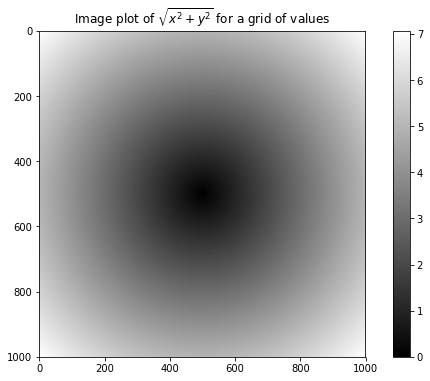

In [498]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [501]:
plt.draw()

<Figure size 720x432 with 0 Axes>

In [502]:
plt.close('all')

###    将条件逻辑表述为数组运算    Expressing Conditional Logic as Array Operations

#### numpy.where函数是三元表达式x if condition else y的⽮量化版本。

In [504]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

* 假设我们想要根据cond中的值选取xarr和yarr的值：当cond中的m值为True时，选取xarr的值，否则从yarr中选取。列表推导式的写法应该如下所示：

In [507]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

####         有⼏个问题 
* 第⼀，它对⼤数组的处理速度不是很快（因为所有⼯作都是由纯Python完成的）。
* 第⼆，⽆法⽤于多维数组。若使⽤np.where，则可以将该功能写得⾮常简洁：

In [510]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

*  np.where的第⼆个和第三个参数不必是数组，它们都可以是标量值。在数据分析⼯作中， where通常⽤于根据另⼀个数组⽽产⽣⼀个新的数组。

In [511]:
arr = np.random.randn(4, 4)
arr

array([[ 0.4573,  0.1157,  1.014 , -1.135 ],
       [-0.2634,  1.3064, -1.6108, -1.0266],
       [ 1.2416, -0.1568, -2.4491, -1.0339],
       [ 1.5995,  0.4741,  0.1513, -0.5422]])

In [512]:
arr > 0

array([[ True,  True,  True, False],
       [False,  True, False, False],
       [ True, False, False, False],
       [ True,  True,  True, False]])

In [513]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2, -2],
       [-2,  2, -2, -2],
       [ 2, -2, -2, -2],
       [ 2,  2,  2, -2]])

In [515]:
np.where(arr > 0, 2, arr) # 只将正值设置为2（set only positive values to 2）

array([[ 2.    ,  2.    ,  2.    , -1.135 ],
       [-0.2634,  2.    , -1.6108, -1.0266],
       [ 2.    , -0.1568, -2.4491, -1.0339],
       [ 2.    ,  2.    ,  2.    , -0.5422]])

###  数学和统计⽅法  Mathematical and Statistical Methods

In [516]:
arr = np.random.randn(5, 4)
arr

array([[-0.4755,  0.1064, -1.3082,  2.1732],
       [ 0.5646, -0.1905, -0.9169, -0.9758],
       [ 2.2123,  0.0739,  1.8186, -1.5815],
       [-0.7744,  0.5529,  0.1061,  3.9275],
       [-0.2551,  0.8541, -0.3648,  0.1311]])

In [517]:
arr.mean()

0.2838980891456039

In [519]:
np.mean(arr)

0.2838980891456039

In [520]:
arr.sum()

5.677961782912078

* mean和sum这类的函数可以接受⼀个axis选项参数，⽤于计算该轴向上的统计值，最终结果是⼀个少⼀维的数组

In [521]:
# arr.mean(1)是“计算⾏的平均值”
arr.mean(axis=1) 

array([ 0.124 , -0.3797,  0.6308,  0.953 ,  0.0913])

In [524]:
# arr.sum(0)是“计算每列的和”。
arr.sum(axis=0)

28

In [525]:
# cumsum和cumprod之类的⽅法不聚合,产⽣⼀个由中间结果组成的数组
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

* 在多维数组中，累加函数（如cumsum）返回的是同样⼤⼩的数组，但是会根据每个低维的切⽚沿着标记轴计算部分聚类：

In [526]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [527]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [531]:
# cumprod，所有元素的累计积
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

###   ⽤于布尔型数组的⽅法 Methods for Boolean Arrays

* 在上⾯这些⽅法中，布尔值会被强制转换为1（True）和0（False）。因此， sum经常被⽤来对布尔型数组中的True值计数

In [532]:
arr = np.random.randn(100)
(arr > 0).sum() # 正值数  Number of positive values

52

* 另外还有两个⽅法any和all，它们对布尔型数组⾮常有⽤。 any⽤
于测试数组中是否存在⼀个或多个True，⽽all则检查数组中所有
值是否都是True：

* 这两个⽅法也能⽤于⾮布尔型数组，所有⾮0元素将会被当做
True。

In [535]:
bools = np.array([False, False, True, False])
bools.any()

True

In [536]:
bools.all()

False

###  排序 Sorting

* 跟Python内置的列表类型⼀样， NumPy数组也可以通过sort⽅法就地排序

In [537]:
arr = np.random.randn(6)
arr

array([ 2.3007,  0.5695,  1.4894,  1.2643, -0.7618, -0.3316])

In [538]:
arr.sort()
arr

array([-0.7618, -0.3316,  0.5695,  1.2643,  1.4894,  2.3007])

* 多维数组可以在任何⼀个轴向上进⾏排序，只需将轴编号传给sort即可：

In [539]:
arr = np.random.randn(5, 3)
arr

array([[-1.7513,  0.6289,  0.2825],
       [-1.3381, -0.5006,  0.1216],
       [ 1.7083, -0.971 , -0.6193],
       [-0.7267,  1.2217,  0.5037],
       [-1.3879,  0.2049,  0.6037]])

In [544]:
arr.sort(1)
arr

array([[-1.7513, -0.6193,  0.1216],
       [-1.3879, -0.5006,  0.6037],
       [-1.3381,  0.2049,  0.6289],
       [-0.971 ,  0.2825,  1.2217],
       [-0.7267,  0.5037,  1.7083]])

* 顶级⽅法np.sort返回的是数组的已排序副本，⽽就地排序则会修改数组本身。计算数组分位数最简单的办法是对其进⾏排序，然后选取特定位置的值

In [550]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] #  5%分位数 5% quantile

-1.6468408091659068

### 唯⼀化以及其它的集合逻辑 Unique and Other Set Logic

* NumPy提供了⼀些针对⼀维ndarray的基本集合运算。最常⽤的可能要数np.unique了，它⽤于找出数组中的唯⼀值并返回已排序的结果：

In [551]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [553]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

* 拿跟np.unique等价的纯Python代码来对⽐⼀下：

In [554]:
sorted(set(names))

['Bob', 'Joe', 'Will']

* 另⼀个函数np.in1d⽤于测试⼀个数组中的值在另⼀个数组中的成员资格，返回⼀个布尔型数组：

In [556]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

## 4.4 ⽤于数组的⽂件输⼊输出 File Input and Output with Arrays

* 更多的⽤户会使⽤pandas或其它⼯具加载⽂本或表格数据
* np.save和np.load是读写磁盘数组数据的两个主要函数

In [557]:
arr = np.arange(10)
np.save('some_array', arr)

In [558]:
#  默认情况下，数组是以未压缩的原始⼆进制格式保存在扩展名为.npy的⽂件中的
# 如果⽂件路径末尾没有扩展名.npy，则该扩展名会被⾃动加上。然后就可以通过np.load读取磁盘上的数组：
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [559]:
# 通过np.savez可以将多个数组保存到⼀个未压缩⽂件中，将数组155以关键字参数的形式传⼊即可
np.savez('array_archive.npz', a=arr, b=arr)

In [560]:
# 加载.npz⽂件时，你会得到⼀个类似字典的对象，该对象会对各个数组进⾏延迟加载
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [562]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

##  4.5 线性代数 Linear Algebra

* 线性代数（如矩阵乘法、矩阵分解、⾏列式以及其他⽅阵数等）是任何数组库的重要组成部分。不像某些语⾔（如MATLAB），通过*对两个⼆维数组相乘得到的是⼀个元素级的积，⽽不是⼀个矩阵点积。因此， NumPy提供了⼀个⽤于矩阵乘法的dot函数（既是⼀个数组⽅法也是numpy命名空间中的⼀个函数）：

In [565]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [566]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

* x.dot(y)等价于np.dot(x, y)：

In [567]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [107]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

* ⼀个⼆维数组跟⼀个⼤⼩合适的⼀维数组的矩阵点积运算之后将会得到⼀个⼀维数组：

In [568]:
np.dot(x, np.ones(3))

array([ 6., 15.])

* @符（类似Python 3.5）也可以⽤作中缀运算符，进⾏矩阵乘法：

In [570]:
x @ np.ones(3)

array([ 6., 15.])

* numpy.linalg中有⼀组标准的矩阵分解运算以及诸如求逆和⾏列式之类的东⻄。它们跟MATLAB和R等语⾔所使⽤的是相同的⾏业标准线性代数库，如BLAS、 LAPACK、 Intel MKL（MathKernel Library，可能有，取决于你的NumPy版本）等：

In [571]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X) #表达式X.T.dot(X)计算X和它的转置X.T的点积。

In [572]:
inv(mat)

array([[ 25.0714,  10.2067,   4.4755, -34.969 ,  20.5507],
       [ 10.2067,   4.5319,   1.7281, -13.8195,   8.3521],
       [  4.4755,   1.7281,   1.6334,  -7.1323,   4.245 ],
       [-34.969 , -13.8195,  -7.1323,  52.0588, -29.9301],
       [ 20.5507,   8.3521,   4.245 , -29.9301,  17.597 ]])

In [573]:
mat.dot(inv(mat))

array([[ 1., -0., -0.,  0.,  0.],
       [-0.,  1., -0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [-0., -0., -0.,  1., -0.],
       [-0., -0., -0., -0.,  1.]])

In [576]:
q, r = qr(mat)
r

array([[-2.6857,  2.0412, -1.7357, -0.208 ,  2.2527],
       [ 0.    , -6.3103, -4.2899,  3.6989, 10.3622],
       [ 0.    ,  0.    , -1.3222, -0.2497, -0.1197],
       [ 0.    ,  0.    ,  0.    , -1.0442, -1.7951],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0241]])

## 4.6 伪随机数⽣成 Pseudorandom Number Generation¶

* numpy.random模块对Python内置的random进⾏了补充，增加了⼀些⽤于⾼效⽣成多种概率分布的样本值的函数。例如，你可以⽤normal来得到⼀个标准正态分布的4×4样本数组：

In [577]:
samples = np.random.normal(size=(4, 4))
samples

array([[-1.2805, -1.0219, -0.7286, -0.7994],
       [ 0.5045,  0.5033, -1.9577, -1.4867],
       [-0.0233,  0.0116, -0.269 ,  1.1461],
       [ 0.53  , -0.0848, -0.1719,  1.8587]])

* ⽽Python内置的random模块则只能⼀次⽣成⼀个样本值。从下⾯的测试结果中可以看出，如果需要产⽣⼤量样本值，numpy.random快了不⽌⼀个数量级：

In [581]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

741 ms ± 6.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29.4 ms ± 538 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


* 我们说这些都是伪随机数，是因为它们都是通过算法基于随机数⽣成器种⼦，在确定性的条件下⽣成的。你可以⽤NumPy的np.random.seed更改随机数⽣成种⼦

In [582]:
np.random.seed(1234)

* numpy.random的数据⽣成函数使⽤了全局的随机种⼦。要避免全局状态，你可以使⽤numpy.random.RandomState，创建⼀个与其它隔离的随机数⽣成器：

In [583]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## 4.7 示例：随机漫步

* 我们通过模拟随机漫步来说明如何运⽤数组运算。先来看⼀个简单的随机漫步的例⼦：从0开始，步⻓1和－1出现的概率相等。下⾯是⼀个通过内置的random模块以纯Python的⽅式实现1000步的随机漫步：

In [586]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [587]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

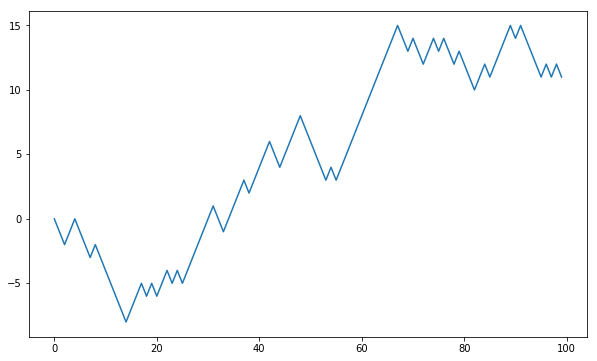

In [588]:
# b图4-4是根据前100个随机漫步值⽣成的折线图：
plt.plot(walk[:100])

* 不难看出，这其实就是随机漫步中各步的累计和，可以⽤⼀个数组运算来实现。因此，我⽤np.random模块⼀次性随机产⽣1000个“掷硬币”结果（即两个数中任选⼀个），将其分别设置为1或－1，然后计算累计和

In [589]:
np.random.seed(12345)

In [590]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

* 有了这些数据之后，我们就可以沿着漫步路径做⼀些统计⼯作了，⽐如求取最⼤值和最⼩值：

In [591]:
walk.min()

-3

In [592]:
walk.max()

31

* 现在来看⼀个复杂点的统计任务——⾸次穿越时间，即随机漫步过程中第⼀次到达某个特定值的时间。假设我们想要知道本次随机漫步需要多久才能距离初始0点⾄少10步远（任⼀⽅向均可）。 np.abs(walk)>=10可以得到⼀个布尔型数组，它表示的是距离是否达到或超过10，⽽我们想要知道的是第⼀个10或－10的索引。可以⽤argmax来解决这个问题，它返回的是该布尔型数组第⼀个最⼤值的索引（True就是最⼤值）：

In [593]:
(np.abs(walk) >= 10).argmax()

37

* 注意，这⾥使⽤argmax并不是很⾼效，因为它⽆论如何都会对数组进⾏完全扫描。在本例中，只要发现了⼀个True，那我们就知道它是个最⼤值了。

### ⼀次模拟多个随机漫步 Simulating Many Random Walks at Once

In [594]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]], dtype=int32)

* 计算所有随机漫步过程的最⼤值和最⼩值：

In [595]:
walks.max()

138

In [596]:
walks.min()

-133

* 得到这些数据之后，我们来计算30或－30的最⼩穿越时间。这⾥稍微复杂些，因为不是5000个过程都到达了30。我们可以⽤any⽅法来对此进⾏检查

In [597]:
hits30 = (np.abs(walks) >= 30).any(1)

In [598]:
hits30

array([False,  True, False, ..., False,  True, False])

In [599]:
hits30.sum() # Number that hit 30 or -30

3410

* 然后我们利⽤这个布尔型数组选出那些穿越了30（绝对值）的随机漫步（⾏），并调⽤argmax在轴1上获取穿越时间：

In [602]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812

* 请尝试⽤其他分布⽅式得到漫步数据。只需使⽤不同的随机数⽣成函数即可，如normal⽤于⽣成指定均值和标准差的正态分布数据

In [603]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))